In [1]:
# Dependencies
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

import datetime as dt
import pandas as pd

# Import seaborn
import seaborn as sns
sns.set_style("whitegrid", {"axes.facecolor": ".9"})

# gmaps
import gmaps
# Import the API key.
from config import weather_api_key

In [2]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=weather_api_key)

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [4]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [5]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 

session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6)



In [6]:
#  3. Convert the June temperatures to a list.
results = []
results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6)


In [7]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temp_df = pd.DataFrame(results, columns=['date','temperature'])

print(june_temp_df.to_string(index=False))

      date  temperature
2010-06-01         78.0
2010-06-02         76.0
2010-06-03         78.0
2010-06-04         76.0
2010-06-05         77.0
2010-06-06         78.0
2010-06-07         77.0
2010-06-08         78.0
2010-06-09         78.0
2010-06-10         79.0
2010-06-11         78.0
2010-06-12         78.0
2010-06-13         78.0
2010-06-14         77.0
2010-06-15         78.0
2010-06-16         78.0
2010-06-17         77.0
2010-06-18         77.0
2010-06-19         82.0
2010-06-20         78.0
2010-06-21         78.0
2010-06-22         78.0
2010-06-23         78.0
2010-06-24         78.0
2010-06-25         77.0
2010-06-26         76.0
2010-06-27         78.0
2010-06-28         78.0
2010-06-29         78.0
2010-06-30         78.0
2011-06-01         77.0
2011-06-02         78.0
2011-06-03         73.0
2011-06-04         70.0
2011-06-05         76.0
2011-06-06         77.0
2011-06-07         77.0
2011-06-08         77.0
2011-06-09         77.0
2011-06-10         78.0
2011-06-11      

In [8]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temp_df.describe()

,temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [9]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.

session.query(Measurement.date, Measurement.tobs).filter(extract('Month', Measurement.date) == 12)



In [10]:
# 7. Convert the December temperatures to a list.
results_D = []
results_D = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12)



In [11]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
december_temp_df = pd.DataFrame(results_D, columns=['date','temperature'])
print(december_temp_df.to_string(index=False))

      date  temperature
2010-12-01         76.0
2010-12-03         74.0
2010-12-04         74.0
2010-12-06         64.0
2010-12-07         64.0
2010-12-08         67.0
2010-12-09         77.0
2010-12-10         66.0
2010-12-11         69.0
2010-12-12         68.0
2010-12-13         68.0
2010-12-14         71.0
2010-12-15         74.0
2010-12-16         67.0
2010-12-17         66.0
2010-12-18         69.0
2010-12-19         71.0
2010-12-23         70.0
2010-12-24         70.0
2010-12-26         74.0
2010-12-27         74.0
2010-12-28         71.0
2010-12-29         75.0
2010-12-30         75.0
2010-12-31         72.0
2011-12-01         69.0
2011-12-02         68.0
2011-12-03         73.0
2011-12-04         74.0
2011-12-05         73.0
2011-12-06         73.0
2011-12-07         73.0
2011-12-08         73.0
2011-12-09         71.0
2011-12-10         73.0
2011-12-11         73.0
2011-12-12         77.0
2011-12-13         72.0
2011-12-14         71.0
2011-12-15         73.0
2011-12-16      

In [12]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
december_temp_df.describe()

,temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## Additional Queries 

In [13]:
#create new df for analysis
df = pd.concat([december_temp_df,june_temp_df], ignore_index=True)
df['month'] = pd.to_datetime(df['date']).dt.month
df.head()

,date,temperature,month
0,2010-12-01,76.0,12
1,2010-12-03,74.0,12
2,2010-12-04,74.0,12
3,2010-12-06,64.0,12
4,2010-12-07,64.0,12


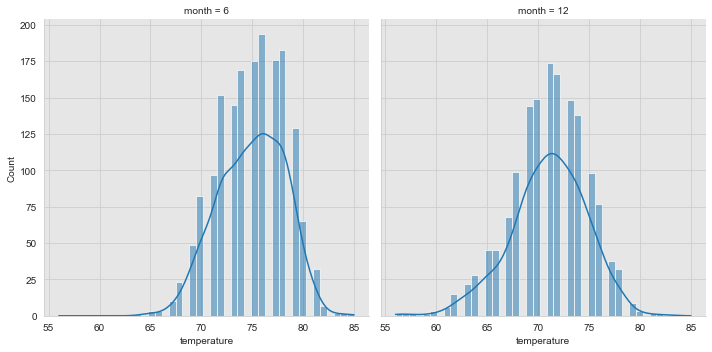

In [14]:
#use seaborne to plot the new df

sns.displot(data=df, x='temperature', col='month', kde=True)



<AxesSubplot:xlabel='temperature', ylabel='Density'>

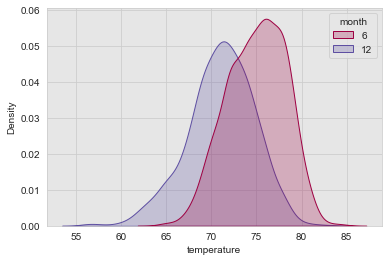

In [15]:
#combine december and june in 1 plot 

sns.kdeplot(data=df, x='temperature', hue='month',shade='True', palette ='Spectral')

In [16]:
# Query for temprature of each station and location

station =[]
station = engine.execute('SELECT s.name, s.latitude, s.longitude , m.tobs FROM measurement as m INNER JOIN station as s on m.station=s.station group by s.name   ' ).fetchall()

station_df = pd.DataFrame(station, columns=['name','latitude','longitude','temperature'])

station_df



,name,latitude,longitude,temperature
0,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,66.0
1,"KANEOHE 838.1, HI US",21.42340,-157.80150,67.0
2,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,67.0
3,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,73.0
4,"PEARL CITY, HI US",21.39340,-157.97510,75.0
5,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,72.0
6,"WAIHEE 837.5, HI US",21.45167,-157.84889,70.0
7,"WAIKIKI 717.2, HI US",21.27160,-157.81680,65.0
8,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,75.0


In [17]:
# Using Gmap to print the stations info  on the map

info_box_template = """
<dl>
<dt>Name</dt><dd>{name}</dd>
<dt>Temp</dt><dd>{temperature}</dd>
</dl>
"""

station_info = [info_box_template.format(**row) for index, row in station_df.iterrows()]

locations = station_df[["latitude", "longitude"]]
max_temp = station_df["temperature"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
marker_layer = gmaps.marker_layer(locations, info_box_content=station_info)
fig.add_layer(marker_layer)
fig

Figure(layout=FigureLayout(height='420px'))